In [1]:
import pandas as pd
df=pd.read_csv('04-02-19.csv')
name=input("Enter Schedule Name: ")
df=df[df['Schedule Name']==name]
cols=['Schedule Name','Adult','From Stage','To Stage','Trip Start Time','Trip End Time','Source','Destination']
df=df[cols]

Enter Schedule Name: 519-A1-AS-MDE


In [2]:
df=df[(df['Source']=='T.NAGAR') & (df['Destination']=='THIRUPORUR')]

df['Trip Start Time'] = pd.to_datetime(df['Trip Start Time'], format='%H:%M:%S')
df['Trip End Time'] = pd.to_datetime(df['Trip End Time'], format='%H:%M:%S')

# Filter rows where trip starts b/w start time and end time
start=input("Enter Start Time: ")
end=input("Enter End Time: ")

start_time = pd.to_datetime(start).time()
end_time = pd.to_datetime(end).time()
df = df[(df['Trip Start Time'].dt.time >= start_time) & 
        (df['Trip Start Time'].dt.time <= end_time)]


Enter Start Time: 08:30:00
Enter End Time: 10:46:00


In [3]:
bus_stages = [
    'T.NAGAR', 'SAIDAPET', 'ANNA UNIV', 'WPTC', 'SRP TOOLS',
    'KANDANCHAV', 'THORAIPAKKAM', 'M K CHAVADI', 'KARAPAKKAM',
    'SHOLINGANALLUR', 'KUMARAN NG', 'CHEMMANCHE', 'NAVALUR',
    'SIPCOT', 'CHURCH', 'PAL. CHEMI', 'HINDUSTAN', 'KELAMBAKKAM',
    'KOMAN NAGAR', 'ENGG', 'CHENGAMMAL', 'KALAVAKKAM','THIRUPORUR'
]

stage_mapping = {stage: i for i, stage in enumerate(bus_stages)}
df['From Stage'] = df['From Stage'].map(stage_mapping)
df['To Stage'] = df['To Stage'].map(stage_mapping)

df.dropna(subset=['From Stage', 'To Stage'], inplace=True)

#creating empty OD matrix
od_matrix = pd.DataFrame(index=range(len(bus_stages)), columns=range(len(bus_stages))).fillna(0)

# populating the matrix 
for index, row in df.iterrows():
    source = int(row['From Stage'])
    destination = int(row['To Stage'])
    adult_count = row['Adult']
    od_matrix.loc[source, destination] += adult_count if not pd.isna(adult_count) else 0

od_matrix['Boarding'] = od_matrix.sum(axis=1)
od_matrix.loc['Alighting'] = od_matrix.sum(axis=0)
od_matrix['Sum']=od_matrix['Boarding']-od_matrix.loc['Alighting']

od_matrix


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,Boarding,Sum
0,0,1,1,0,8,6,2,10,3,6,...,0,0,1,0,0,0,0,1,42,42.0
1,0,0,0,1,0,2,0,1,0,0,...,0,0,1,0,0,0,0,0,5,4.0
2,0,0,0,0,0,0,1,1,1,0,...,0,0,2,0,0,0,0,0,8,7.0
3,0,0,0,0,0,1,1,1,3,0,...,0,0,0,0,0,0,0,0,9,8.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,-7.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-9.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,-2.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-13.0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-7.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,-5.0


In [4]:
#to display od matrix with stages instead of numbers 

od_matrix = pd.DataFrame(index=bus_stages, columns=bus_stages).fillna(0)

# Populate the matrix 
for index, row in df.iterrows():
    source = bus_stages[int(row['From Stage'])]
    destination = bus_stages[int(row['To Stage'])]
    adult_count = row['Adult']
    od_matrix.loc[source, destination] += adult_count


od_matrix['Boarding'] = od_matrix.sum(axis=1)

od_matrix['Alighting'] = od_matrix.sum(axis=0)
od_matrix['Sum']=od_matrix['Boarding']-od_matrix['Alighting']

In [5]:
arr=od_matrix['Sum'].values
import numpy as np
passengers= np.cumsum(arr)
print(passengers)

[42 46 53 61 54 45 43 30 23 18 17 19 17 17 15 15 15  4  4  4  4  4  0]


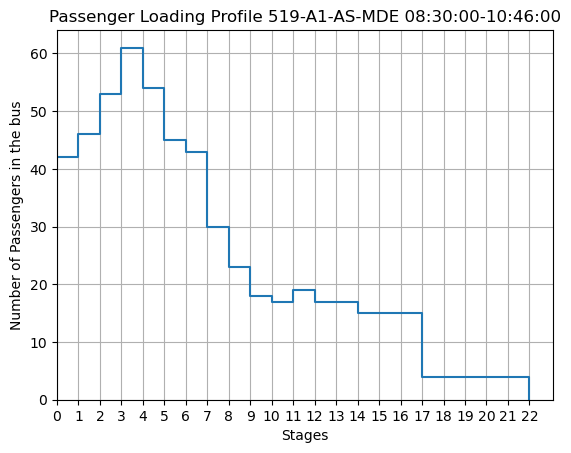

In [6]:
import matplotlib.pyplot as plt

stages = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

plt.step(stages, passengers, where='post')
plt.title(f"Passenger Loading Profile {name} {start}-{end}")
plt.xlabel('Stages')
plt.ylabel('Number of Passengers in the bus')
plt.xticks(stages)
plt.grid(True)

# x-axis and y-axis intersect at the origin
plt.xlim(left=0)  
plt.ylim(bottom=0)  

plt.show()